## Imports

In [1]:
import warnings

# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()
    
warnings.filterwarnings('ignore')

#warning website: https://queirozf.com/entries/suppressing-ignoring-warnings-in-python-reference-and-examples

In [68]:
import pandas as pd
import numpy as np
import re
import string
from pprint import pprint

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score

import pyLDAvis
import pyLDAvis.gensim as gensimvis
import pyLDAvis.sklearn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.models.nmf import Nmf

import bitermplus as btm

import spacy
import operator
from operator import itemgetter


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachaellam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachaellam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Way around missing packages that for some reason I can't download the normal way

import os
import nltk

# Create NLTK data directory
NLTK_DATA_DIR = './nltk_data'
if not os.path.exists(NLTK_DATA_DIR):
        os.makedirs(NLTK_DATA_DIR)

nltk.data.path.append(NLTK_DATA_DIR)

# Download packages and store in directory above
nltk.download('punkt', download_dir=NLTK_DATA_DIR)
nltk.download('averaged_perceptron_tagger', download_dir=NLTK_DATA_DIR)
nltk.download('wordnet', download_dir=NLTK_DATA_DIR)

[nltk_data] Downloading package punkt to ./nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     ./nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to ./nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Data Import

Upload csv below if you don't want to run all the deata cleaning again

In [4]:
contents = pd.read_csv('data/contents.csv')
titles = pd.read_csv('data/titles.csv')

In [5]:
df = pd.read_csv("data/doj.csv")
df = df.drop(columns=['id','topics','components'], axis=1)

## Data Cleaning

In [6]:
df['contents'] = df['contents'].astype(str)
df['contents_processed'] = \
df['contents'].map(lambda x: re.sub('[,\.!?]','',x))
df['contents_processed'] = \
df['contents_processed'].map(lambda x: x.lower())
df['contents_processed']

df['title'] = df['title'].astype(str)
df['title_processed'] = \
df['title'].map(lambda x: re.sub('[,\.!?]','',x))
df['title_processed'] = \
df['title_processed'].map(lambda x: x.lower())
df['title_processed']

df = df.drop(columns=['title', 'contents'])
df

<>:3: DeprecationWarning: invalid escape sequence \.
<>:10: DeprecationWarning: invalid escape sequence \.
<>:3: DeprecationWarning: invalid escape sequence \.
<>:10: DeprecationWarning: invalid escape sequence \.
/var/folders/fm/xwcj8f4d2xl395kr3dnsf8z40000gn/T/ipykernel_50402/202145478.py:3: DeprecationWarning: invalid escape sequence \.
  df['contents'].map(lambda x: re.sub('[,\.!?]','',x))
/var/folders/fm/xwcj8f4d2xl395kr3dnsf8z40000gn/T/ipykernel_50402/202145478.py:10: DeprecationWarning: invalid escape sequence \.
  df['title'].map(lambda x: re.sub('[,\.!?]','',x))


,date,contents_processed,title_processed
0,2018-07-27,the us district court for the northern distric...,district court enters permanent injunction aga...
1,2018-07-27,the department of justice announced today that...,justice department announces resolution with ...
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,kansas city area laboratory owner convicted of...
3,2018-07-26,the department of justice announced today that...,3m company agrees to pay $91 million to resolv...
4,2018-07-26,a federal grand jury in new orleans louisiana ...,amite residents charged with civil rights crim...
...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,jordanian national arrested in new york to fac...
17820,2018-07-30,a charlottesville virginia man was sentenced t...,former virginia high school science teacher se...
17821,2018-07-30,a federal jury convicted a sterling virginia w...,former owner of sleep study businesses convict...
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,attorney general sessions delivers remarks at ...


In [7]:
contents = df.drop(['title_processed'], axis=1)
titles = df.drop(['contents_processed'], axis=1)

## Tokenization / Lemmatization / Stop Word Removal

Using collections to count number of words and see if I should add any to the stop_words list

In [990]:
lemma = contents.lemma.str.cat(sep=', ')

AttributeError: 'DataFrame' object has no attribute 'lemma'

In [499]:
from collections import Counter

# split() returns list of all the words in the string
split_it = lemma.split()
  
# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(100)
  
print(most_occur)

[('the', 692857), ('of', 415991), ('and', 401143), ('to', 344021), ('in', 250838), ('be', 231342), ('a', 184474), ('for', 125033), ('"', 122470), ('that', 108158), ('’s', 107810), ('-', 101818), ('with', 76217), ('by', 72682), ('attorney', 71318), ('department', 66089), ('on', 65841), ('have', 59526), ('us', 55837), ('as', 54294), ('from', 50327), ('district', 47888), ('justice', 46574), ('division', 44804), ('at', 44555), ('this', 41697), (')', 40838), ('(', 40463), ('we', 37893), ('an', 36678), ('$', 35775), ('or', 35400), ('general', 34977), ('office', 34965), ('charge', 34919), ('criminal', 34606), (';', 33007), ('their', 32995), ('will', 32239), ('case', 31606), ('assistant', 31534), ('who', 31153), ('his', 30852), ('federal', 30628), ('fraud', 29794), ('law', 29369), ('service', 28478), ('he', 28436), ('act', 27948), ('other', 27853), ('tax', 27712), ('today', 27344), ('year', 27269), ('enforcement', 26485), ('our', 26070), ('court', 25725), ('they', 25675), ('also', 25069), ('no

Lemmatizing contents_processed on both contents and titles dataframes

In [10]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatize(data):
    doc = nlp(data)
    return " ".join([token.lemma_ for token in doc])

In [11]:
contents['lemma'] = contents['contents_processed'].apply(lemmatize)
titles['lemma'] = titles['title_processed'].apply(lemmatize)

In [12]:
contents

,date,contents_processed,lemma
0,2018-07-27,the us district court for the northern distric...,the us district court for the northern distric...
1,2018-07-27,the department of justice announced today that...,the department of justice announce today that ...
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,yesterday a federal judge find ahmed el - sher...
3,2018-07-26,the department of justice announced today that...,the department of justice announce today that ...
4,2018-07-26,a federal grand jury in new orleans louisiana ...,a federal grand jury in new orleans louisiana ...
...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,washington – a jordanian national reside in mo...
17820,2018-07-30,a charlottesville virginia man was sentenced t...,a charlottesville virginia man be sentence tod...
17821,2018-07-30,a federal jury convicted a sterling virginia w...,a federal jury convict a sterling virginia wom...
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,remark as prepare for delivery \r\n thank you ...


Creating tokens of the lemmatized words

In [13]:
stop_words = stopwords.words('english')
stop_words.extend(['department', 'sentenced', 'justice', 'man', 'attorney', 'district', 'law', 'case', 'general',
                  'assistant', 'office', 'law', 'division', 'us', 'yesterday', 'today', 'enforcement', 'united',
                  'states', 'also', 'say', 'one', 'criminal', 'court', 'defendant', 'year', 'act', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [14]:
data = contents.lemma.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

In [15]:
contents['tokens'] = data_words

In [16]:
data_title = titles.lemma.values.tolist()
title_words = list(sent_to_words(data))
title_words = remove_stopwords(title_words)

In [17]:
titles['tokens'] = title_words

In [18]:
contents

,date,contents_processed,lemma,tokens
0,2018-07-27,the us district court for the northern distric...,the us district court for the northern distric...,"[northern, illinois, enter, permanent, injunct..."
1,2018-07-27,the department of justice announced today that...,the department of justice announce today that ...,"[announce, swiss, base, mireli, hold, sa, reac..."
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,yesterday a federal judge find ahmed el - sher...,"[federal, judge, find, ahmed, el, sherif, owne..."
3,2018-07-26,the department of justice announced today that...,the department of justice announce today that ...,"[announce, company, headquarter, st, paul, min..."
4,2018-07-26,a federal grand jury in new orleans louisiana ...,a federal grand jury in new orleans louisiana ...,"[federal, grand, jury, new, orleans, louisiana..."
...,...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,washington – a jordanian national reside in mo...,"[washington, jordanian, national, reside, mont..."
17820,2018-07-30,a charlottesville virginia man was sentenced t...,a charlottesville virginia man be sentence tod...,"[charlottesville, virginia, sentence, month, p..."
17821,2018-07-30,a federal jury convicted a sterling virginia w...,a federal jury convict a sterling virginia wom...,"[federal, jury, convict, sterling, virginia, w..."
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,remark as prepare for delivery \r\n thank you ...,"[remark, prepare, delivery, thank, beth, gener..."


## Count Vectorizer

Creating a vocabulary of words that have been run through the TFIDF to remove any words in more than 90% of documents and less than 5% of documents becuase using NMF with TFIDF got the best results visually (ie. words made most sense) but having a hard time generating the coherence and jaccard metrics for that model

In [19]:
#vectorizer = CountVectorizer(max_df = 0.7)
vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range = (1,1), max_df = 0.9, min_df=0.05)
vectorizer.fit_transform(contents.lemma)
vector_vocab = vectorizer.get_feature_names()

In [20]:
vector_vocab

['10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250000',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '40',
 '50',
 '60',
 '800',
 'ability',
 'able',
 'abuse',
 'accept',
 'access',
 'accord',
 'account',
 'accountability',
 'accountable',
 'accusation',
 'across',
 'action',
 'activity',
 'addition',
 'additional',
 'additionally',
 'address',
 'administration',
 'administrator',
 'admit',
 'advance',
 'affair',
 'agency',
 'agent',
 'aggressively',
 'agree',
 'agreement',
 'aid',
 'aka',
 'al',
 'allegation',
 'allege',
 'allegedly',
 'allow',
 'along',
 'already',
 'america',
 'american',
 'americans',
 'among',
 'amount',
 'andrew',
 'announce',
 'announcement',
 'another',
 'anti',
 'antitrust',
 'anyone',
 'appear',
 'application',
 'apply',
 'appropriate',


In [21]:
def MIN_DF(texts):
    return [word for word in texts 
            if word in vector_vocab.keys()]

def TFIDF_MIN_DF(texts):
    return [word for word in texts 
            if word in vector_vocab]

stop_words = stopwords.words('english')
stop_words.extend(['also', 'say', 'one', 'criminal', 'court', 'defendant', 'year', 'act', 'use'])

def remove_stopwords_2(texts):
    return [word for word in texts
           if word not in stop_words]

In [22]:
contents['max_df'] = contents['tokens'].apply(TFIDF_MIN_DF)
#contents['max_df'] = contents['tokens'].apply(remove_stopwords_2)

In [23]:
contents

,date,contents_processed,lemma,tokens,max_df
0,2018-07-27,the us district court for the northern distric...,the us district court for the northern distric...,"[northern, illinois, enter, permanent, injunct...","[northern, enter, injunction, three, relate, c..."
1,2018-07-27,the department of justice announced today that...,the department of justice announce today that ...,"[announce, swiss, base, mireli, hold, sa, reac...","[announce, base, hold, reach, resolution, tax,..."
2,2018-07-27,yesterday a federal judge found ahmed el-sheri...,yesterday a federal judge find ahmed el - sher...,"[federal, judge, find, ahmed, el, sherif, owne...","[federal, judge, find, owner, safety, officer,..."
3,2018-07-26,the department of justice announced today that...,the department of justice announce today that ...,"[announce, company, headquarter, st, paul, min...","[announce, company, paul, agree, pay, million,..."
4,2018-07-26,a federal grand jury in new orleans louisiana ...,a federal grand jury in new orleans louisiana ...,"[federal, grand, jury, new, orleans, louisiana...","[federal, grand, jury, new, return, six, count..."
...,...,...,...,...,...
17819,2018-07-30,washington – a jordanian national residing in ...,washington – a jordanian national reside in mo...,"[washington, jordanian, national, reside, mont...","[washington, national, arrest, international, ..."
17820,2018-07-30,a charlottesville virginia man was sentenced t...,a charlottesville virginia man be sentence tod...,"[charlottesville, virginia, sentence, month, p...","[virginia, sentence, month, prison, child, ann..."
17821,2018-07-30,a federal jury convicted a sterling virginia w...,a federal jury convict a sterling virginia wom...,"[federal, jury, convict, sterling, virginia, w...","[federal, jury, convict, virginia, woman, heal..."
17822,2018-07-30,remarks as prepared for delivery\r\nthank you ...,remark as prepare for delivery \r\n thank you ...,"[remark, prepare, delivery, thank, beth, gener...","[prepare, thank, thank, leadership, legal, pol..."


Saving content to csvs so I don't have to rerun everything above

In [24]:
contents.to_csv('data/contents.csv', index=False)
titles.to_csv('data/titles.csv', index=False)

## LDA (Gensim)

Using max_def column as dictionary and corpus to try and replicate TFIDF

In [25]:
content_words = list(contents['max_df'])

In [26]:
# Create Dictionary
id2word_content = corpora.Dictionary(content_words)
# Create Corpus
texts_content = content_words
# Term Document Frequency
corpus_content = [id2word_content.doc2bow(text) for text in texts_content]

In [27]:
num_topics = list(np.arange(2, 15, 1))
LDA_models = {}
for num in range(0, len(num_topics)):
    LDA_models[num] = gensim.models.LdaMulticore(corpus=corpus_content, id2word=id2word_content, 
                                                 num_topics=num_topics[num])

In [28]:
LDA_topics = {}
for num in range(0, len(num_topics)):
    LDA_topics[num] = LDA_models[num].print_topics()

In [38]:
pprint(LDA_topics)

{0: [(0,
      '0.010*"tax" + 0.009*"federal" + 0.009*"charge" + 0.008*"service" + '
      '0.008*"fraud" + 0.006*"investigation" + 0.006*"guilty" + 0.005*"civil" '
      '+ 0.005*"include" + 0.005*"work"'),
     (1,
      '0.011*"charge" + 0.009*"fraud" + 0.008*"federal" + 0.007*"service" + '
      '0.007*"investigation" + 0.007*"include" + 0.006*"health" + '
      '0.006*"sentence" + 0.006*"company" + 0.006*"information"')],
 1: [(0,
      '0.009*"charge" + 0.009*"federal" + 0.007*"investigation" + '
      '0.007*"service" + 0.007*"right" + 0.006*"civil" + 0.006*"tax" + '
      '0.006*"fraud" + 0.006*"include" + 0.006*"state"'),
     (1,
      '0.012*"tax" + 0.009*"fraud" + 0.009*"charge" + 0.009*"service" + '
      '0.007*"include" + 0.007*"information" + 0.006*"fbi" + 0.006*"sentence" '
      '+ 0.006*"million" + 0.006*"federal"'),
     (2,
      '0.011*"charge" + 0.010*"federal" + 0.009*"fraud" + 0.008*"service" + '
      '0.007*"investigation" + 0.007*"make" + 0.007*"count" + 0.0

In [40]:
LDA_coherence_scores = {}
for num in range(0, len(num_topics)):
    LDA_coherence_scores[num] = [CoherenceModel(model=LDA_models[num],
                         texts=content_words,
                         dictionary=id2word_content,
                         coherence='c_v').get_coherence()]

In [41]:
LDA_coherence_scores_av = [np.array(list).mean() for list in [scores for scores in LDA_coherence_scores.values()]]

In [42]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [43]:
from itertools import combinations

In [44]:
LDA_jaccard_scores = []
for i in [*range(0,len(num_topics))]:
    jaccards = []
    for j in list(combinations([*range(0,len(LDA_topics[i]))],2)):
        t1 = LDA_topics[i][j[0]]
        t2 = LDA_topics[i][j[1]]
        jaccards.append(jaccard_similarity(set(re.sub("[^A-Za-z ]", "", t1[1]).split("  ")), 
                                           set(re.sub("[^A-Za-z ]", "", t2[1]).split("  "))))
        mean = sum(jaccards)/len(jaccards)
    LDA_jaccard_scores.append(mean)

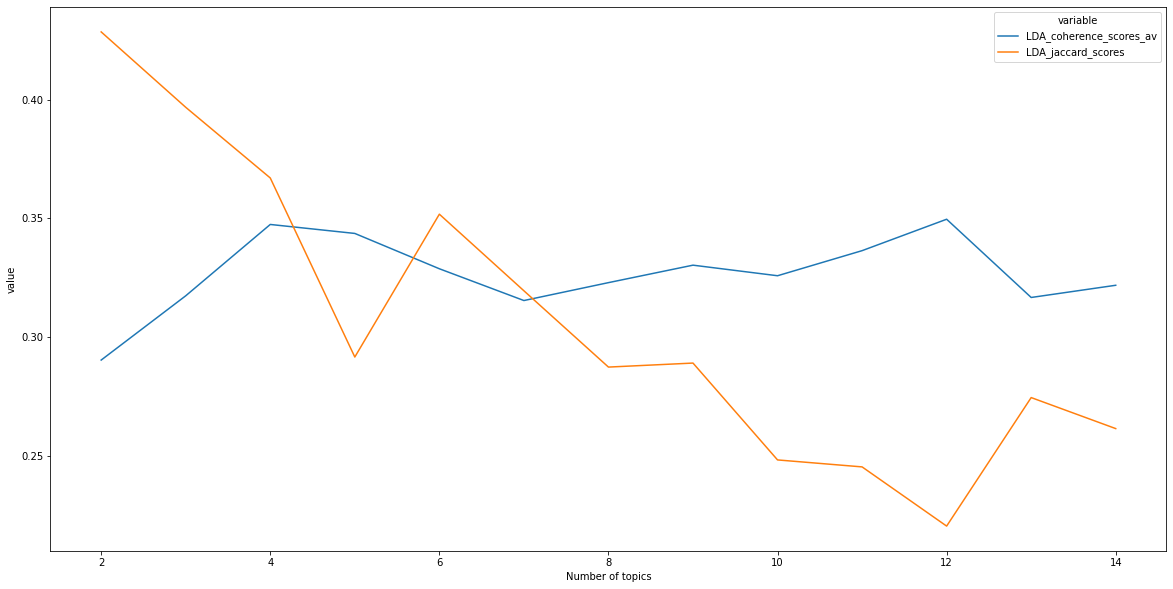

In [45]:
plt.figure(figsize=(20,10))
LDA = pd.DataFrame(list(zip(num_topics, LDA_coherence_scores_av, LDA_jaccard_scores)), 
                  columns = ['num_topics', 'LDA_coherence_scores_av', 'LDA_jaccard_scores'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(LDA, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [46]:
lda_model = LDA_models[4]
lda_topics = lda_model.print_topics()
pprint(lda_topics)

[(0,
  '0.011*"service" + 0.010*"charge" + 0.008*"fraud" + 0.007*"fbi" + '
  '0.007*"crime" + 0.007*"medicare" + 0.006*"prison" + 0.006*"sentence" + '
  '0.006*"company" + 0.006*"include"'),
 (1,
  '0.010*"tax" + 0.008*"service" + 0.008*"fraud" + 0.008*"federal" + '
  '0.008*"charge" + 0.007*"million" + 0.007*"include" + 0.006*"guilty" + '
  '0.006*"pay" + 0.006*"investigation"'),
 (2,
  '0.011*"federal" + 0.009*"sentence" + 0.009*"fraud" + 0.008*"charge" + '
  '0.008*"service" + 0.007*"state" + 0.007*"fbi" + 0.007*"make" + '
  '0.007*"investigation" + 0.006*"provide"'),
 (3,
  '0.011*"right" + 0.010*"civil" + 0.008*"federal" + 0.007*"charge" + '
  '0.007*"victim" + 0.007*"service" + 0.007*"make" + 0.007*"crime" + '
  '0.007*"fraud" + 0.006*"include"'),
 (4,
  '0.014*"charge" + 0.013*"tax" + 0.010*"federal" + 0.010*"fraud" + '
  '0.008*"indictment" + 0.007*"return" + 0.007*"investigation" + '
  '0.006*"information" + 0.006*"include" + 0.006*"civil"'),
 (5,
  '0.012*"tax" + 0.011*"charg

In [47]:
LDAvis_prepared_nouns = pyLDAvis.gensim.prepare(lda_model, corpus_content, id2word_content)
pyLDAvis.display(LDAvis_prepared_nouns)

/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour o

## NMF (Gensim)

Using same dictionary and corpus as earlier (min_df column)

In [48]:
num_topics = list(np.arange(2, 15, 1))
NMF_models = {}

for num in range(0, len(num_topics)):
    NMF_models[num] = Nmf(corpus=corpus_content, num_topics=num+2, id2word=id2word_content)

In [49]:
NMF_topics = {}
for num in range(0, len(num_topics)):
    NMF_topics[num] = NMF_models[num].print_topics()

In [50]:
pprint(NMF_topics)

{0: [(0,
      '0.079*"sentence" + 0.047*"distribute" + 0.043*"month" + 0.043*"prison" '
      '+ 0.036*"release" + 0.036*"offense" + 0.036*"grant" + '
      '0.036*"supervised" + 0.027*"conspiracy" + 0.027*"base"'),
     (1,
      '0.010*"fraud" + 0.009*"charge" + 0.009*"service" + 0.009*"federal" + '
      '0.008*"include" + 0.006*"investigation" + 0.006*"work" + 0.006*"health" '
      '+ 0.006*"program" + 0.006*"million"')],
 1: [(0,
      '0.017*"fraud" + 0.015*"charge" + 0.012*"service" + 0.009*"million" + '
      '0.009*"company" + 0.009*"health" + 0.008*"investigation" + 0.008*"pay" '
      '+ 0.008*"guilty" + 0.007*"medicare"'),
     (1,
      '0.010*"state" + 0.010*"civil" + 0.010*"drug" + 0.010*"federal" + '
      '0.010*"right" + 0.008*"new" + 0.008*"include" + 0.008*"work" + '
      '0.008*"sentence" + 0.008*"crime"'),
     (2,
      '0.085*"sentence" + 0.052*"distribute" + 0.046*"month" + 0.044*"prison" '
      '+ 0.040*"offense" + 0.040*"release" + 0.040*"supervised" + '


In [52]:
NMF_coherence_scores = {}
for num in range(0, len(num_topics)):
    NMF_coherence_scores[num] = [CoherenceModel(model=NMF_models[num],
                         texts=content_words,
                         dictionary=id2word_content,
                         coherence='c_v').get_coherence()]

In [53]:
NMF_coherence_scores_av = [np.array(list).mean() for list in [scores for scores in NMF_coherence_scores.values()]]

In [54]:
NMF_jaccard_scores = []
for i in [*range(0,len(num_topics))]:
    jaccards = []
    for j in list(combinations([*range(0,len(NMF_topics[i]))],2)):
        t1 = NMF_topics[i][j[0]]
        t2 = NMF_topics[i][j[1]]
        jaccards.append(jaccard_similarity(set(re.sub("[^A-Za-z ]", "", t1[1]).split("  ")), 
                                           set(re.sub("[^A-Za-z ]", "", t2[1]).split("  "))))
        mean = sum(jaccards)/len(jaccards)
    NMF_jaccard_scores.append(mean)

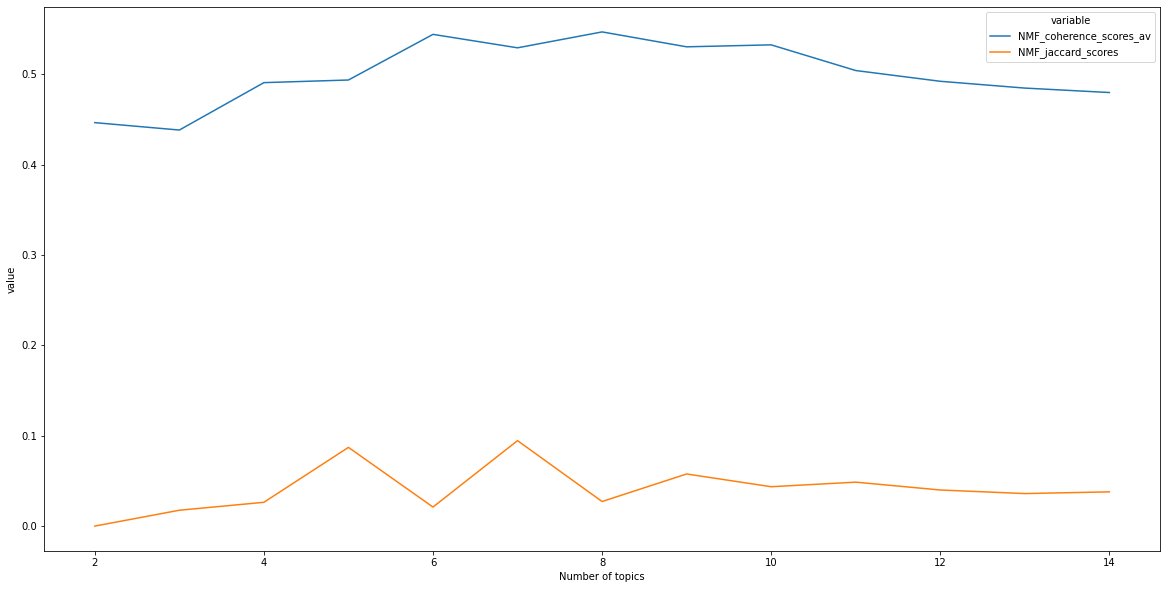

In [55]:
plt.figure(figsize=(20,10))

NMF = pd.DataFrame(list(zip(num_topics, NMF_coherence_scores_av, NMF_jaccard_scores)), 
                  columns = ['num_topics', 'NMF_coherence_scores_av', 'NMF_jaccard_scores'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(NMF, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [56]:
best_nmf_model = NMF_models[6]
best_nmf_topics = best_nmf_model.print_topics()
pprint(best_nmf_topics)

[(0,
  '0.025*"claim" + 0.022*"settlement" + 0.020*"health" + 0.020*"government" + '
  '0.019*"false" + 0.017*"company" + 0.017*"pay" + 0.017*"million" + '
  '0.016*"drug" + 0.015*"civil"'),
 (1,
  '0.057*"account" + 0.051*"bank" + 0.017*"agreement" + 0.016*"client" + '
  '0.015*"program" + 0.015*"taxpayer" + 0.015*"asset" + 0.013*"irs" + '
  '0.013*"financial" + 0.012*"relate"'),
 (2,
  '0.102*"sentence" + 0.069*"distribute" + 0.058*"month" + 0.053*"offense" + '
  '0.053*"grant" + 0.051*"release" + 0.051*"supervised" + 0.049*"prison" + '
  '0.035*"base" + 0.029*"conspiracy"'),
 (3,
  '0.020*"charge" + 0.019*"fbi" + 0.018*"agent" + 0.015*"new" + 0.015*"award" '
  '+ 0.014*"special" + 0.011*"investigation" + 0.011*"include" + 0.010*"york" '
  '+ 0.010*"section"'),
 (4,
  '0.054*"fraud" + 0.040*"medicare" + 0.033*"health" + 0.026*"care" + '
  '0.023*"charge" + 0.019*"service" + 0.017*"hhs" + 0.016*"scheme" + '
  '0.012*"patient" + 0.012*"fraudulent"'),
 (5,
  '0.014*"right" + 0.012*"crim

## NMF TFIDF (Gensim)

NMF using gensim. The contents of the model are still not as informative as sklearn's but coherence was able to be measured. No Jaccard.

In [57]:
#contents['lemma_tokens'] = [word_tokenize(i) for i in contents['lemma']] 
#contents['lemma_tokens'] = contents['lemma_tokens'].apply(remove_stopwords_2)

# Use Gensim's NMF to get the best num of topics via coherence score
texts = contents['tokens']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=0.05,
    no_above=0.9,
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(2, 15 + 1, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(num_topics, coherence_scores))
print('Coherence Scores:', scores)
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]
print(best_num_topics)

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(2, max(topic_nums) + 1, 1), fontsize=12)
plt.yticks(fontsize=12)


plt.show()

In [ ]:
nmf_model = Nmf(corpus=corpus, num_topics=11, id2word=dictionary)
pprint(nmf_model.print_topics())

## NMF TFIDF 2nd Attempt (Sklearn)

Attempt to use sklearn NMF model. Wasn't able to calculate jaccard or coherence.

In [ ]:
#removing extra stop words
stop_words = text.ENGLISH_STOP_WORDS

vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range = (1,1), max_df = 0.9, min_df=0.05)

contents_transform = vectorizer.fit_transform(contents.lemma)

contents_dataframe = pd.DataFrame(contents_transform.toarray(), columns = vectorizer.get_feature_names())

contents_dataframe.index = contents.index

contents_dataframe.head()

In [ ]:
#iterate through topics
def display_topics(model, feature_names, num_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic", ix)
        else:
            print("\nTopic: '", topic_names[ix], "'")
        print(",".join([feature_names[i] \
            for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [ ]:
contents

In [ ]:
contents['lemma_tokens'] = [word_tokenize(i) for i in contents['lemma']] 

# Use Gensim's NMF to get the best num of topics via coherence score
texts = contents['lemma_tokens']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=0.05,
    no_above=0.9,
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
def convert(list):
    return tuple(list)

In [ ]:
num_topics = list(np.arange(2, 15, 1))
topic_models = []
dicts = {}
coherence_scores = []
# try each value of k
for k in num_topics:
    print("\n" + "Applying NMF for k=%d ..." % k)
    # run NMF
    model = NMF(k) 
    W = model.fit_transform(contents_dataframe)
    H = convert(model.components_)   
    # store for later
    dicts[k] = convert(H)
    display_topics(model, vectorizer.get_feature_names(), 10)
    topic_models.append((k,W,H))
    
    

In [ ]:
dicts

Attempting to apply jaccard function from earlier to this dictionary with no success.

In [ ]:
NMF_jaccard_scores = []

for i in [*num_topics]:
    jaccards = []
    for j in list(combinations([*range(len(dicts[i]))], 2)):
        t1 = dicts[i][j[0]]
        t2 = dicts[i][j[1]]
        jaccards.append(jaccard_similarity((t1[1]), 
                                           (t2[1])))
        mean = sum(jaccards)/len(jaccards)
    NMF_jaccard_scores.append(mean)

In [ ]:
for i in [*num_topics]:
    jaccards = []
    for j in list(combinations([*range(len(dicts[i]))], 2)):
        t1 = dicts[i][j[0]]
        t2 = dicts[i][j[1]]
        print (t1[1]).split(" ")

In [ ]:
NMF_jaccard_scores

## NMF TFIDF 3rd Attempt (Sklearn)

Adapting [this script](https://github.com/derekgreene/topic-model-tutorial/blob/master/3%20-%20Parameter%20Selection%20for%20NMF.ipynb), I was able to use sklearn's NMF model and calculate coherence. Coherence is lower than the gensim model but I am still unable ot calculate jaccard. Informative topics have been produced! This has also been the fastest model yet.

In [58]:
from pathlib import Path
import operator, joblib

In [59]:
snippets = contents['lemma'].tolist()

Couldn't use max_df because gensim's Word2Vec (which is used a few blocks later) doesn't have that feature. TFIDF and Word2Vec have to match for the code to work.

In [60]:
vectorizer = TfidfVectorizer(stop_words=stop_words, min_df = 0.05)
A = vectorizer.fit_transform(contents.lemma)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 17824 X 897 TF-IDF-normalized document-term matrix


In [61]:
terms =  list(vectorizer.get_feature_names_out())
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 897 distinct terms


In [62]:
joblib.dump((A,terms,snippets), "data/contents-tfidf.pkl") 

['data/contents-tfidf.pkl']

In [63]:
(A,terms,snippets) = joblib.load("data/contents-tfidf.pkl")
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 17824 X 897 document-term matrix


In [64]:
kmin, kmax = 4, 20

In [69]:
topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...
Applying NMF for k=20 ...


In [ ]:
topic_models

In [71]:
contents['lemma_tokens'] = [word_tokenize(i) for i in contents['lemma']] 

w2v_model = gensim.models.Word2Vec(contents['lemma_tokens'], min_count=0.05, sg=1)

In [72]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]) )
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)


def jaccard_similarity(w2v_model, term_rankings):
    overall_jaccard = 0.0
    for topic_index in range(len(term_rankings)):
        pair_scores = []
        for pair in combinations (term_rankings[topic_index], 2):
            intersection = set(pair[0]).intersection(set(pair[1]))
            union = set(pair[0]).union(set(pair[1]))
            pair_scores.append(float(len(intersection))/float(len(union)))
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_jaccard += topic_score
    return overall_jaccard / len(term_rankings)

In [73]:
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [74]:
k_values = []
coherences = []
jaccards = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    jaccards.append( jaccard_similarity( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )
    print("K=%02d: Jaccard=%.4f" % ( k, jaccards[-1] ) + "\n")

K=04: Coherence=0.4172
K=04: Jaccard=0.2083

K=05: Coherence=0.4093
K=05: Jaccard=0.2035

K=06: Coherence=0.4084
K=06: Jaccard=0.2141

K=07: Coherence=0.4191
K=07: Jaccard=0.2097

K=08: Coherence=0.4094
K=08: Jaccard=0.2007

K=09: Coherence=0.4110
K=09: Jaccard=0.2036

K=10: Coherence=0.4136
K=10: Jaccard=0.1976

K=11: Coherence=0.4257
K=11: Jaccard=0.2002

K=12: Coherence=0.4087
K=12: Jaccard=0.1947

K=13: Coherence=0.4086
K=13: Jaccard=0.2016

K=14: Coherence=0.4099
K=14: Jaccard=0.2090

K=15: Coherence=0.4149
K=15: Jaccard=0.2183

K=16: Coherence=0.4163
K=16: Jaccard=0.2070

K=17: Coherence=0.4141
K=17: Jaccard=0.2088

K=18: Coherence=0.4139
K=18: Jaccard=0.2111

K=19: Coherence=0.4165
K=19: Jaccard=0.2098

K=20: Coherence=0.4126
K=20: Jaccard=0.2080



In [75]:
k_values

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Based on the two figure's below, the best coherence is at k=12 and the best jaccard is at k=9. I would assume then, the best k would be between 9 and 12. There is a steep drop at k=10 for jaccard, so I might assume k=9 is the best here. Potentially k=15 could also be appropriate.

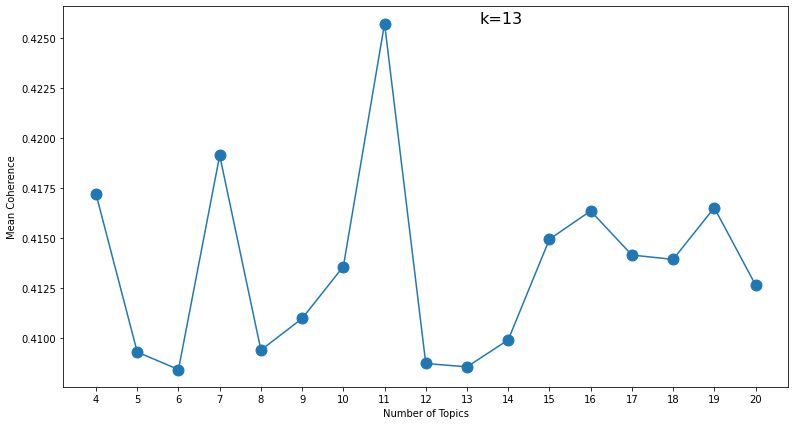

In [81]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter(k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymin = min(coherences)
ymax = max(coherences)
xpos = coherences.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[9] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

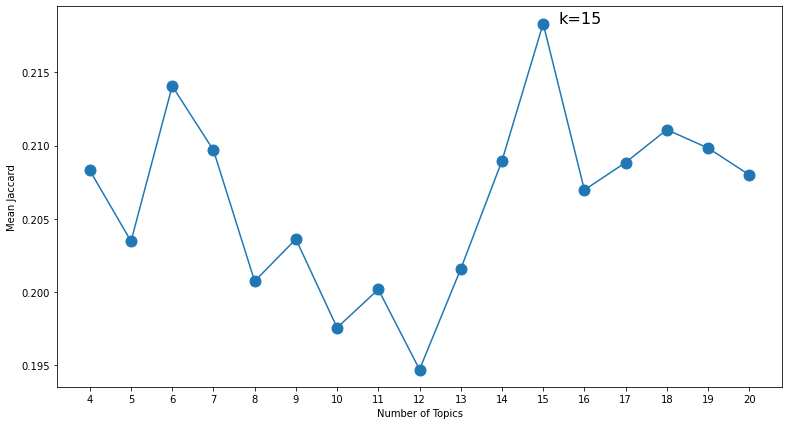

In [79]:
fig = plt.figure(figsize=(13,7))
# create the line plot
ax = plt.plot( k_values, jaccards )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Jaccard")
# add the points
plt.scatter(k_values, jaccards, s=120)
# find and annotate the maximum point on the plot
ymin = min(jaccards)
ymax = max(jaccards)
xpos = jaccards.index(ymin)
#best_k = k_values[xpos]
best_k = k_values[11] #manually set the best k value
plt.annotate("k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

Plotted both jaccard and coherence, but it might actually be easier to see the best k based on the separated plots above.

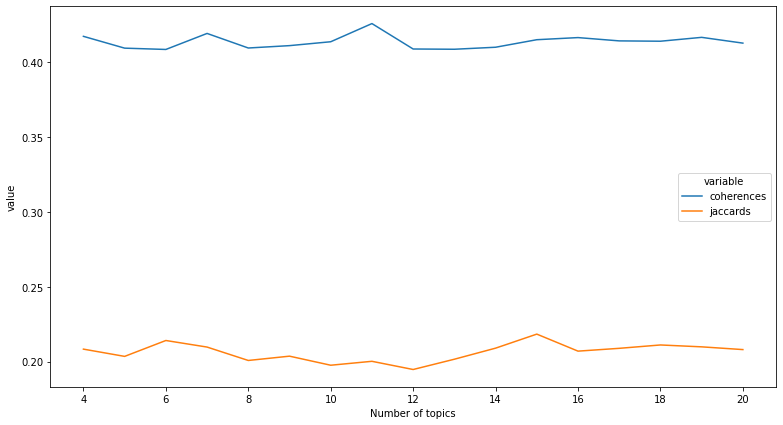

In [82]:
plt.figure(figsize=(13,7))
NMF_sklearn = pd.DataFrame(list(zip(k_values, coherences, jaccards)), 
                  columns = ['num_topics', 'coherences', 'jaccards'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(NMF_sklearn, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [83]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]

Chose k=12 as the best k. Lowest Coherence for lowest number of topics

In [84]:
for topic_index in range(k):
    descriptor = get_descriptor(terms, H, topic_index, 10)
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % (topic_index+1, str_descriptor) )

Topic 01: us, sentence, attorney, district, guilty, plead, admit, plea, assistant, prison
Topic 02: tax, return, irs, income, refund, prepare, preparer, false, file, injunction
Topic 03: medicare, health, care, fraud, hhs, patient, oig, strike, medical, bill
Topic 04: settlement, claim, department, company, resolve, government, environmental, civil, health, united
Topic 05: right, officer, civil, assault, victim, attorney, police, law, department, division
Topic 06: child, sexual, project, safe, abuse, victim, internet, exploit, well, attorney
Topic 07: housing, discrimination, disability, right, employment, 800, fair, status, civil, department
Topic 08: indictment, charge, count, allege, presume, allegedly, innocent, prove, maximum, grand
Topic 09: antitrust, price, competition, industry, fine, market, consumer, division, propose, conspiracy
Topic 10: law, community, enforcement, crime, support, national, new, state, work, justice
Topic 11: bank, account, financial, fraud, irs, money,

## BTM Model

In [85]:
texts = contents['lemma'].str.strip().tolist()

In [ ]:
# PREPROCESSING
# Obtaining terms frequency in a sparse matrix and corpus vocabulary
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
tf = np.array(X.sum(axis=0)).ravel()
# Vectorizing documents
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
docs_lens = list(map(len, docs_vec))
# Generating biterms
biterms = btm.get_biterms(docs_vec)

In [ ]:
# INITIALIZING AND RUNNING MODEL
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=10, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)

## BTM pt.2

In [1]:
text = " ".join(review for review in contents.lemma)

vec = CountVectorizer()
X = vec.fit_transform([text])

NameError: name 'contents' is not defined

In [ ]:
from biterm.utility import vec_to_biterms
vocab = np.array(vec.get_feature_names_out())
biterms = vec_to_biterms(X)

In [ ]:
from biterm.cbtm import oBTM

btm = oBTM(num_topics=15, V=vocab)
topics = btm.fit_transform(biterms, iterations=50)